In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
fpgen = AllChem.GetMorganGenerator(radius=2)
from ete3 import NCBITaxa

In [14]:
df = pd.read_csv('/Users/guillaumebelissent/Docs/EPFL/MA/ADA/BindingDB_All.tsv', sep = '\t', nrows=100000)[['BindingDB Reactant_set_id', 'Ligand SMILES', 'Ligand InChI',
                                                                                                            'Ligand InChI Key', 'BindingDB MonomerID', 'BindingDB Ligand Name',
                                                                                                            'Target Name','Target Source Organism According to Curator or DataSource', 'Ki (nM)',
                                                                                                            ]].reset_index(drop=True)
f = lambda x: x.split('(')[0].strip()
df['Target Source Organism According to Curator or DataSource'] = df['Target Source Organism According to Curator or DataSource'].astype(str).apply(f)

/var/folders/6_/6g10b43x17ngwmk4l9msb2mc0000gn/T/ipykernel_29351/2286559746.py:1: DtypeWarning: Columns (8,9,10,11,15,17,21,43,45,46,47,48,50,51,52,53,54,55,57,58,59,62,63,64,65,66,67,69,70,71,72,74,75,76,77,78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/guillaumebelissent/Docs/EPFL/MA/ADA/BindingDB_All.tsv', sep = '\t', nrows=100000)[['BindingDB Reactant_set_id', 'Ligand SMILES', 'Ligand InChI',


/var/folders/6_/6g10b43x17ngwmk4l9msb2mc0000gn/T/ipykernel_29351/481146856.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sns.countplot(df, x = 'Target Source Organism According to Curator or DataSource', order = pd.value_counts(df['Target Source Organism According to Curator or DataSource']).iloc[:100].index)


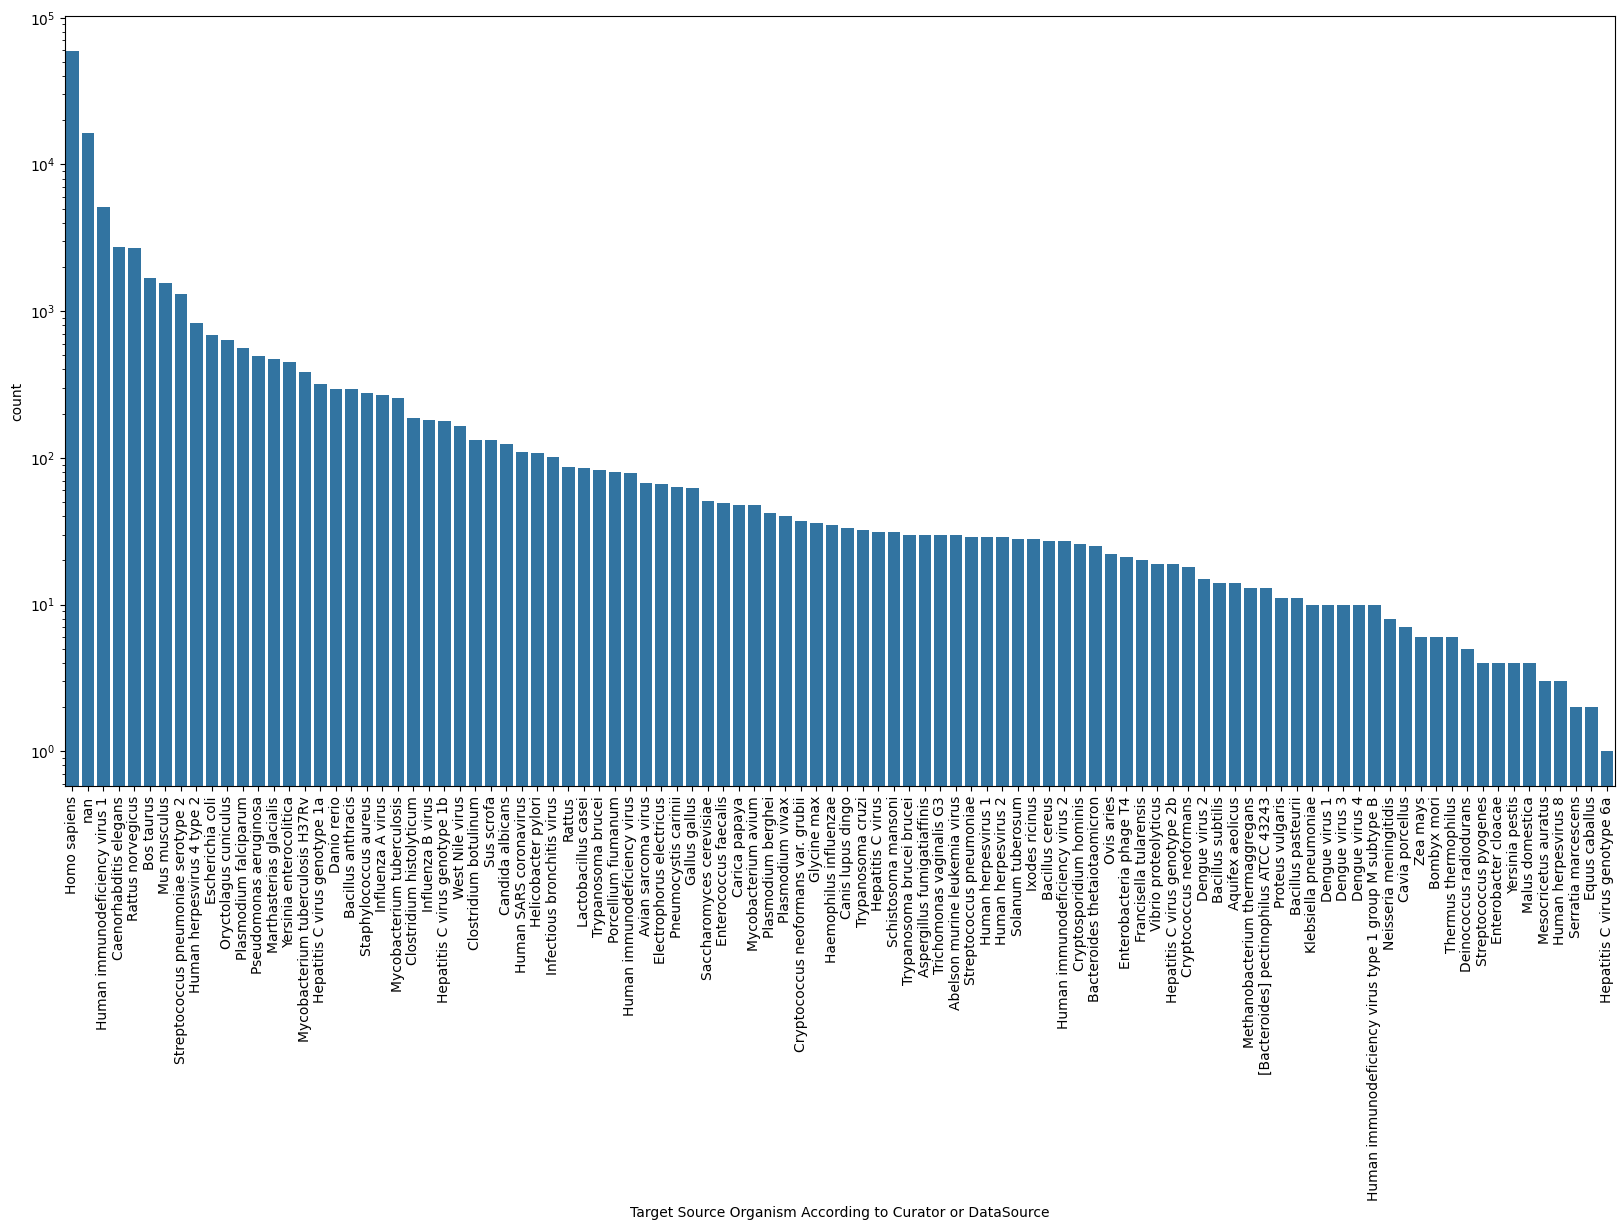

In [15]:

plt.figure(figsize=(20,10))
sns.countplot(df, x = 'Target Source Organism According to Curator or DataSource', order = pd.value_counts(df['Target Source Organism According to Curator or DataSource']).iloc[:100].index)
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

In [3]:
ncbi = NCBITaxa()
def get_taxon_id(species_name):
    """
    Get the NCBI taxon ID for a given species name using ete3.
    
    Parameters:
        species_name (str): The scientific name of the species.
        
    Returns:
        taxon_id (int): The corresponding taxon ID, or None if not found.
    """
    try:
        # Get taxon ID for the species name
        taxon_id = ncbi.get_name_translator([species_name])
        
        if species_name in taxon_id:
            return taxon_id[species_name][0]  # Return the taxon ID
        else:
            return None  # Species not found
    except Exception as e:
        print(f"Error fetching taxon ID: {e}")
        return None

In [4]:
df['Taxon'] = [get_taxon_id(species) for species in df['Target Source Organism According to Curator or DataSource'].astype(str)]
df.loc[df['Taxon'].isna(), 'Taxon'] = [
    get_taxon_id(species.split('(')[0].strip())  # Split and strip to clean up species name
    for species in df.loc[df['Taxon'].isna(), 'Target Source Organism According to Curator or DataSource'].astype(str)
]
df.loc[df['Taxon'].isna(), 'Taxon'] = 0
df['Taxon'] = df['Taxon'].astype(int)
df

/var/folders/6_/6g10b43x17ngwmk4l9msb2mc0000gn/T/ipykernel_29351/4195953876.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 2847144, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 2847144, None, None, None, None, None, None, None, 2847144, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 2847144, None, None, None, None, 2847144, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),Taxon
0,18118,CN(C)C(=S)Oc1ccc2CCC(NCC#C)c2c1,InChI=1S/C15H18N2OS/c1-4-9-16-14-8-6-11-5-7-12...,CDQZBZUAACBTIU-UHFFFAOYSA-N,10787,"Aminoindan deriv. 25a::N,N-dimethyl-1-{[3-(pro...",Acetylcholinesterase,Homo sapiens,NaN,9606
1,64998,CN1CCN(CC1)c1ccc2nc([nH]c2c1)-c1c(N)c2c(F)cccc...,InChI=1S/C21H21FN6O/c1-27-7-9-28(10-8-27)12-5-...,PIQCTGMSNWUMAF-UHFFFAOYSA-N,25118,(3Z)-4-amino-5-fluoro-3-[5-(4-methylpiperazino...,Ribosomal protein S6 kinase alpha-5,Homo sapiens,NaN,9606
2,60622,CN(C)CCCn1cc(C2=C(C(=O)NC2=O)c2csc3ccccc23)c2c...,InChI=1S/C25H23N3O2S/c1-27(2)12-7-13-28-14-18(...,XRZURBBBXNHUNO-UHFFFAOYSA-N,33966,"maleimide derivative, 5",Protein kinase C beta type,Homo sapiens,NaN,9606
3,83834,CCOC(=O)c1sc(nc1C)N(C)C(C)=O,InChI=1S/C10H14N2O3S/c1-5-15-9(14)8-6(2)11-10(...,QUYPYEYQAFHKSV-UHFFFAOYSA-N,45453,2-(Acetyl-methyl-amino)-4-methyl-thiazole-5-ca...,Coagulation factor XII,NaN,NaN,0
4,96701,CCC(C(=O)NCCC[C@H]1CN2[C@H](CN=C2N1CCc1ccc(Cl)...,InChI=1S/C32H42Cl2N4O/c1-2-27(24-10-5-3-6-11-2...,NHBYBGSYODBNPJ-ODZNMXLQSA-N,51852,"MLS000697856::N-[3-[(3S,6S)-3-cyclohexyl-7-[2-...",Mitogen-activated protein kinase kinase kinase...,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
4995,25480,CN[C@H](Cc1ccccc1)C(=O)N1CCC[C@H]1C(=O)NC(CCCN...,InChI=1S/C28H36N8O3/c1-31-22(17-18-9-3-2-4-10-...,DPKBODMBRLVNFI-NRSZHQCHSA-N,14113,"(2S)-N-[1-(1H-1,3-benzodiazol-2-yl)-5-carbamim...",Serine protease 1,Bos taurus,12,9913
4996,22209,CC(C)Oc1cc(OCCN2CCOCC2)cc2ncnc(Nc3c4OCOc4ccc3C...,InChI=1S/C24H27ClN4O5/c1-15(2)34-20-12-16(31-1...,BCHOPQZXYFIQMM-UHFFFAOYSA-N,12253,"AZD0530 analogue 31::N-(5-chloro-2H-1,3-benzod...",Vascular endothelial growth factor receptor 2,Homo sapiens,NaN,9606
4997,6540,CC(=C(C#N)C#N)c1ccc(N)cc1,InChI=1S/C11H9N3/c1-8(10(6-12)7-13)9-2-4-11(14...,UDNNQFHSLNHDGH-UHFFFAOYSA-N,4353,2-[1-(4-aminophenyl)ethylidene]propanedinitril...,Epidermal growth factor receptor,Homo sapiens,NaN,9606
4998,21283,CC(NC(=O)C(Cc1ccccc1)NS(=O)(=O)c1cccc(c1)C(F)(...,InChI=1S/C21H20F3N5O4S3/c1-12(17(30)26-19-27-2...,OMBKWZNZMXWHMG-UHFFFAOYSA-N,11848,"3-phenyl-N-{1-[(5-sulfanyl-1,3,4-thiadiazol-2-...",Collagenase ColG,Clostridium histolyticum,9000,1498


In [5]:
lineages = [ncbi.get_lineage(id) for id in df['Taxon']]
dicts = [ncbi.get_rank(lineage) if lineage else {} for lineage in lineages]
taxon_df = pd.concat([pd.DataFrame({rank:lin for lin,rank in dict.items()}, index=[0]) for dict in dicts], axis = 0)
taxon_df = taxon_df[['species', 'genus', 'family', 'order', 'class', 'phylum', 'kingdom', 'superkingdom'][::-1]].reset_index(drop=True)

In [9]:
pd.concat([df, taxon_df], axis = 1)

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),Taxon,superkingdom,kingdom,phylum,class,order,family,genus,species
0,18118,CN(C)C(=S)Oc1ccc2CCC(NCC#C)c2c1,InChI=1S/C15H18N2OS/c1-4-9-16-14-8-6-11-5-7-12...,CDQZBZUAACBTIU-UHFFFAOYSA-N,10787,"Aminoindan deriv. 25a::N,N-dimethyl-1-{[3-(pro...",Acetylcholinesterase,Homo sapiens,NaN,9606,2759.0,33208.0,7711.0,40674.0,9443.0,9604.0,9605.0,9606.0
1,64998,CN1CCN(CC1)c1ccc2nc([nH]c2c1)-c1c(N)c2c(F)cccc...,InChI=1S/C21H21FN6O/c1-27-7-9-28(10-8-27)12-5-...,PIQCTGMSNWUMAF-UHFFFAOYSA-N,25118,(3Z)-4-amino-5-fluoro-3-[5-(4-methylpiperazino...,Ribosomal protein S6 kinase alpha-5,Homo sapiens,NaN,9606,2759.0,33208.0,7711.0,40674.0,9443.0,9604.0,9605.0,9606.0
2,60622,CN(C)CCCn1cc(C2=C(C(=O)NC2=O)c2csc3ccccc23)c2c...,InChI=1S/C25H23N3O2S/c1-27(2)12-7-13-28-14-18(...,XRZURBBBXNHUNO-UHFFFAOYSA-N,33966,"maleimide derivative, 5",Protein kinase C beta type,Homo sapiens,NaN,9606,2759.0,33208.0,7711.0,40674.0,9443.0,9604.0,9605.0,9606.0
3,83834,CCOC(=O)c1sc(nc1C)N(C)C(C)=O,InChI=1S/C10H14N2O3S/c1-5-15-9(14)8-6(2)11-10(...,QUYPYEYQAFHKSV-UHFFFAOYSA-N,45453,2-(Acetyl-methyl-amino)-4-methyl-thiazole-5-ca...,Coagulation factor XII,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,96701,CCC(C(=O)NCCC[C@H]1CN2[C@H](CN=C2N1CCc1ccc(Cl)...,InChI=1S/C32H42Cl2N4O/c1-2-27(24-10-5-3-6-11-2...,NHBYBGSYODBNPJ-ODZNMXLQSA-N,51852,"MLS000697856::N-[3-[(3S,6S)-3-cyclohexyl-7-[2-...",Mitogen-activated protein kinase kinase kinase...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,25480,CN[C@H](Cc1ccccc1)C(=O)N1CCC[C@H]1C(=O)NC(CCCN...,InChI=1S/C28H36N8O3/c1-31-22(17-18-9-3-2-4-10-...,DPKBODMBRLVNFI-NRSZHQCHSA-N,14113,"(2S)-N-[1-(1H-1,3-benzodiazol-2-yl)-5-carbamim...",Serine protease 1,Bos taurus,12,9913,2759.0,33208.0,7711.0,40674.0,91561.0,9895.0,9903.0,9913.0
4996,22209,CC(C)Oc1cc(OCCN2CCOCC2)cc2ncnc(Nc3c4OCOc4ccc3C...,InChI=1S/C24H27ClN4O5/c1-15(2)34-20-12-16(31-1...,BCHOPQZXYFIQMM-UHFFFAOYSA-N,12253,"AZD0530 analogue 31::N-(5-chloro-2H-1,3-benzod...",Vascular endothelial growth factor receptor 2,Homo sapiens,NaN,9606,2759.0,33208.0,7711.0,40674.0,9443.0,9604.0,9605.0,9606.0
4997,6540,CC(=C(C#N)C#N)c1ccc(N)cc1,InChI=1S/C11H9N3/c1-8(10(6-12)7-13)9-2-4-11(14...,UDNNQFHSLNHDGH-UHFFFAOYSA-N,4353,2-[1-(4-aminophenyl)ethylidene]propanedinitril...,Epidermal growth factor receptor,Homo sapiens,NaN,9606,2759.0,33208.0,7711.0,40674.0,9443.0,9604.0,9605.0,9606.0
4998,21283,CC(NC(=O)C(Cc1ccccc1)NS(=O)(=O)c1cccc(c1)C(F)(...,InChI=1S/C21H20F3N5O4S3/c1-12(17(30)26-19-27-2...,OMBKWZNZMXWHMG-UHFFFAOYSA-N,11848,"3-phenyl-N-{1-[(5-sulfanyl-1,3,4-thiadiazol-2-...",Collagenase ColG,Clostridium histolyticum,9000,1498,2.0,NaN,1239.0,186801.0,186802.0,31979.0,1769729.0,1498.0
